In [364]:
# Mengimport libraries yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Membaca file csv BMI_train
df = pd.read_csv('Downloads/BMI_train.csv')
df

,Age,Height,Weight,Bmi,BmiClass
0,19,1.740,68.00,22.460034,Normal Weight
1,25,1.760,77.28,24.948347,Normal Weight
2,50,1.840,106.90,31.574905,Obese Class 1
3,51,1.700,107.30,37.128028,Obese Class 2
4,29,1.630,58.00,21.829952,Normal Weight
...,...,...,...,...,...
587,28,1.832,88.30,26.309329,Overweight
588,42,1.690,67.20,23.528588,Normal Weight
589,42,1.650,66.20,24.315886,Normal Weight
590,49,1.740,84.02,27.751354,Overweight


In [365]:
# Mengganti nama kolom dan menampilkan tabel setelah nama kolom diganti
df.rename(columns={'Age':'Usia'}, inplace=True)
df.rename(columns={'Weight':'Berat'}, inplace=True)
df.rename(columns={'Height':'Tinggi'}, inplace=True)
df

,Usia,Tinggi,Berat,Bmi,BmiClass
0,19,1.740,68.00,22.460034,Normal Weight
1,25,1.760,77.28,24.948347,Normal Weight
2,50,1.840,106.90,31.574905,Obese Class 1
3,51,1.700,107.30,37.128028,Obese Class 2
4,29,1.630,58.00,21.829952,Normal Weight
...,...,...,...,...,...
587,28,1.832,88.30,26.309329,Overweight
588,42,1.690,67.20,23.528588,Normal Weight
589,42,1.650,66.20,24.315886,Normal Weight
590,49,1.740,84.02,27.751354,Overweight


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Usia      592 non-null    int64  
 1   Tinggi    592 non-null    float64
 2   Berat     592 non-null    float64
 3   Bmi       592 non-null    float64
 4   BmiClass  592 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 23.3+ KB


In [367]:
df.describe()

,Usia,Tinggi,Berat,Bmi
count,592.000000,592.000000,592.000000,592.000000
mean,31.258446,1.713679,79.261541,26.491312
std,11.376904,0.085357,32.603817,9.041087
min,15.000000,1.460000,25.900000,12.150497
25%,22.000000,1.680000,63.675000,22.306681
50%,29.000000,1.729000,73.040000,24.320752
75%,39.000000,1.760000,83.370000,27.238527
max,60.000000,2.070000,270.000000,63.011972


In [368]:
df.isnull().sum()

Usia        0
Tinggi      0
Berat       0
Bmi         0
BmiClass    0
dtype: int64

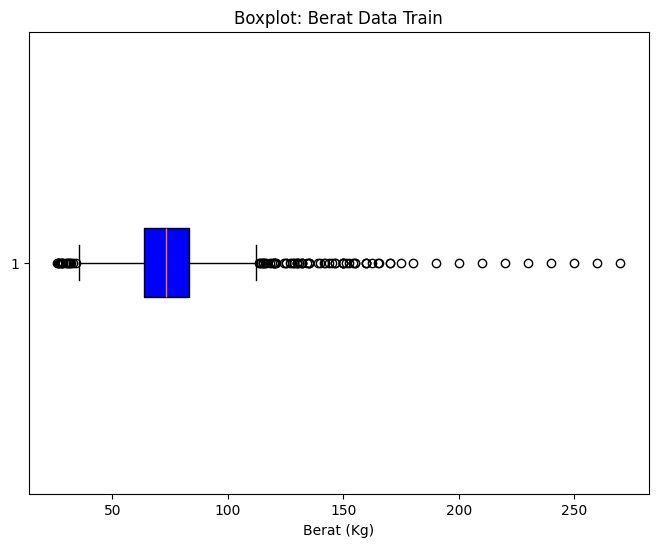

In [369]:
# Mengecek outliers dengan boxplot untuk data berat train
plt.figure(figsize=(8, 6))
plt.boxplot(df["Berat"], vert=False, patch_artist=True, boxprops=dict(facecolor='blue', color='black'))
plt.title("Boxplot: Berat Data Train")
plt.xlabel("Berat (Kg)")
plt.show()

In [370]:
# Menghitung nilai Q1, Q2, dan Q3
Q1 = df["Berat"].quantile(0.25)  # Quartile pertama (25%)
Q2 = df["Berat"].quantile(0.50)  # Quartile kedua (Median)
Q3 = df["Berat"].quantile(0.75)  # Quartile ketiga (75%)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menampilkan nilai Q1, Q2, dan Q3
print(f"Q1: {Q1}, Q2: {Q2}, Q3: {Q3}, IQR: {IQR}")

Q1: 63.675000000000004, Q2: 73.03999999999999, Q3: 83.37, IQR: 19.695


In [371]:
# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR  # Batas bawah
upper_bound = Q3 + 1.5 * IQR  # Batas atas

# Menampilkan nilai batas bawah dan batas atas
print(f"Batas bawah: {lower_bound}, Batas atas: {upper_bound}")

Batas bawah: 34.13250000000001, Batas atas: 112.91250000000001


In [372]:
# Menghapus outlier
df_cleaned = df[(df["Berat"] >= lower_bound) & (df["Berat"] <= upper_bound)]

# Menampilkan jumlah data sebelum dan setelah penghapusan outlier
print(f"Jumlah data sebelum outlier dihapus: {len(df)}")
print(f"Jumlah data setelah outlier dihapus: {len(df_cleaned)}")

Jumlah data sebelum outlier dihapus: 592
Jumlah data setelah outlier dihapus: 506


In [389]:
# Menghitung nilai Q1, Q2, dan Q3
Q1 = df_cleaned["Berat"].quantile(0.25)  # Quartile pertama (25%)
Q2 = df_cleaned["Berat"].quantile(0.50)  # Quartile kedua (Median)
Q3 = df_cleaned["Berat"].quantile(0.75)  # Quartile ketiga (75%)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menampilkan nilai Q1, Q2, dan Q3
print(f"Q1: {Q1}, Q2: {Q2}, Q3: {Q3}, IQR: {IQR}")

Q1: 63.425, Q2: 71.9455, Q3: 78.6, IQR: 15.174999999999997


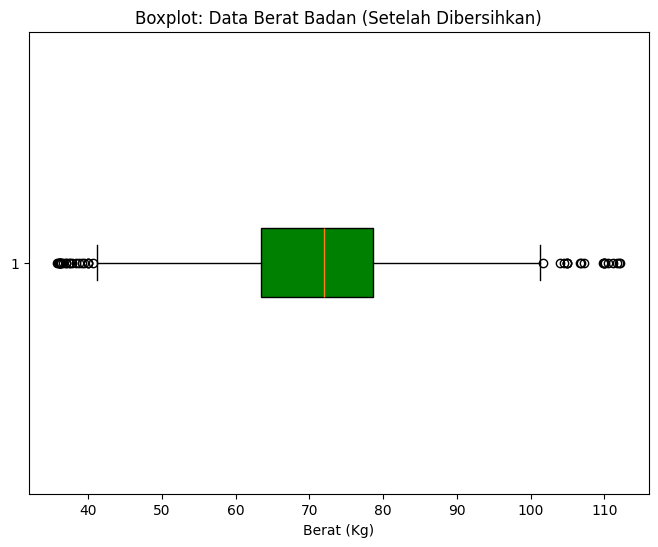

In [392]:
# Mmebuat boxplot untuk data yang sudah dibersihkan
plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned["Berat"], vert=False, patch_artist=True, boxprops=dict(facecolor='green', color='black'))
plt.title("Boxplot: Data Berat Badan (Setelah Dibersihkan)")
plt.xlabel("Berat (Kg)")
plt.show()

In [374]:
x = df[["Usia","Tinggi"]].to_numpy()
y = df["Berat"].to_numpy()

x = sm.add_constant(x)
model_prediksi = sm.OLS(y, x).fit();
print(model_prediksi.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     208.6
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           3.17e-69
Time:                        20:15:16   Log-Likelihood:                -2743.8
No. Observations:                 592   AIC:                             5494.
Df Residuals:                     589   BIC:                             5507.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -345.1360     20.806    -16.588      0.0

In [375]:
df1 = pd.read_csv('Downloads/BMI_test.csv')
df1

,Age,Height,Weight,Bmi,BmiClass,Nama
0,19,1.8000,69.899,23.113824,Normal Weight,Aisyah
1,29,1.7900,74.720,23.320121,Normal Weight,Budi
2,37,1.6800,52.000,18.424036,Underweight,Citra
3,28,1.6900,56.700,19.852246,Normal Weight,Dani
4,49,1.5100,36.600,16.051928,Underweight,Eka
...,...,...,...,...,...,...
144,28,1.6300,60.000,22.582709,Normal Weight,Tama
145,26,1.7498,74.570,24.354954,Normal Weight,Udin
146,28,1.6700,145.000,51.991825,Obese Class 3,Vivi
147,43,1.7500,83.010,27.105306,Overweight,Wulan


In [376]:
df1.rename(columns={'Age':'Usia'}, inplace=True)
df1.rename(columns={'Weight':'Berat'}, inplace=True)
df1.rename(columns={'Height':'Tinggi'}, inplace=True)
df1

,Usia,Tinggi,Berat,Bmi,BmiClass,Nama
0,19,1.8000,69.899,23.113824,Normal Weight,Aisyah
1,29,1.7900,74.720,23.320121,Normal Weight,Budi
2,37,1.6800,52.000,18.424036,Underweight,Citra
3,28,1.6900,56.700,19.852246,Normal Weight,Dani
4,49,1.5100,36.600,16.051928,Underweight,Eka
...,...,...,...,...,...,...
144,28,1.6300,60.000,22.582709,Normal Weight,Tama
145,26,1.7498,74.570,24.354954,Normal Weight,Udin
146,28,1.6700,145.000,51.991825,Obese Class 3,Vivi
147,43,1.7500,83.010,27.105306,Overweight,Wulan


In [377]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Usia      149 non-null    int64  
 1   Tinggi    149 non-null    float64
 2   Berat     149 non-null    float64
 3   Bmi       149 non-null    float64
 4   BmiClass  149 non-null    object 
 5   Nama      149 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 7.1+ KB


In [378]:
df1.describe()

,Usia,Tinggi,Berat,Bmi
count,149.000000,149.000000,149.000000,149.000000
mean,33.046980,1.692944,75.039114,25.865265
std,12.641809,0.086992,30.701560,9.930172
min,15.000000,1.460000,29.000000,13.062475
25%,21.000000,1.640000,56.000000,19.900319
50%,31.000000,1.710000,70.000000,23.251696
75%,44.000000,1.750000,82.500000,27.249306
max,61.000000,1.910000,182.700000,66.301350


In [379]:
df1.isnull().sum()

Usia        0
Tinggi      0
Berat       0
Bmi         0
BmiClass    0
Nama        0
dtype: int64

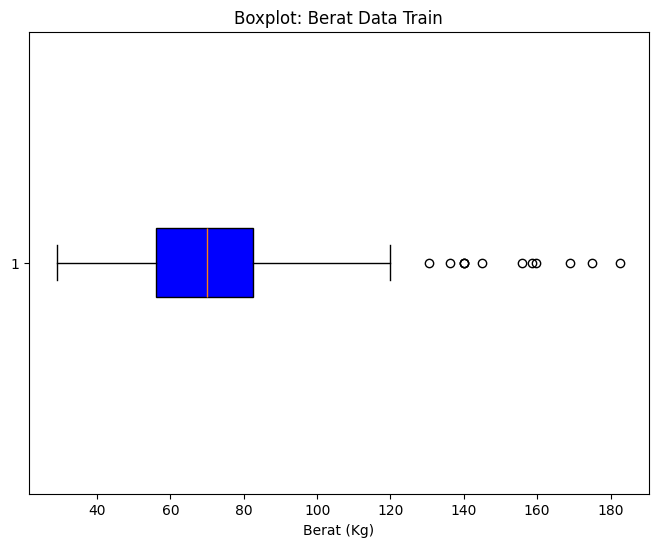

In [380]:
# Mengecek outliers dengan boxplot untuk data berat train
plt.figure(figsize=(8, 6))
plt.boxplot(df1["Berat"], vert=False, patch_artist=True, boxprops=dict(facecolor='blue', color='black'))
plt.title("Boxplot: Berat Data Train")
plt.xlabel("Berat (Kg)")
plt.show()

In [381]:
# Menghitung nilai Q1, Q2, dan Q3
Q1 = df1["Berat"].quantile(0.25)  # Quartile pertama (25%)
Q2 = df1["Berat"].quantile(0.50)  # Quartile kedua (Median)
Q3 = df1["Berat"].quantile(0.75)  # Quartile ketiga (75%)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menampilkan nilai Q1, Q2, dan Q3
print(f"Q1: {Q1}, Q2: {Q2}, Q3: {Q3}, IQR: {IQR}")

Q1: 56.0, Q2: 70.0, Q3: 82.5, IQR: 26.5


In [382]:
# Menentukan batas bawah dan atas berdasarkan IQR
lower_bound = Q1 - 1.5 * IQR  # Batas bawah
upper_bound = Q3 + 1.5 * IQR  # Batas atas

# Menampilkan nilai batas bawah dan batas atas
print(f"Batas bawah: {lower_bound}, Batas atas: {upper_bound}")

Batas bawah: 16.25, Batas atas: 122.25


In [383]:
# Menghapus outlier
df_cleaned1 = df1[(df1["Berat"] >= lower_bound) & (df1["Berat"] <= upper_bound)]

# Menampilkan jumlah data sebelum dan setelah penghapusan outlier
print(f"Jumlah data sebelum outlier dihapus: {len(df1)}")
print(f"Jumlah data setelah outlier dihapus: {len(df_cleaned1)}")

Jumlah data sebelum outlier dihapus: 149
Jumlah data setelah outlier dihapus: 137


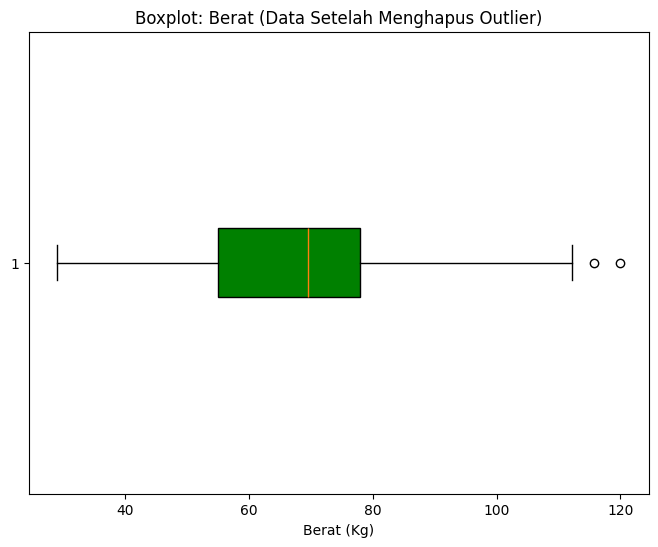

In [384]:
# Mmebuat boxplot untuk data yang sudah dibersihkan
plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned1["Berat"], vert=False, patch_artist=True, boxprops=dict(facecolor='green', color='black'))
plt.title("Boxplot: Berat (Data Setelah Menghapus Outlier)")
plt.xlabel("Berat (Kg)")
plt.show()

In [385]:
# Mengambil kolom 'Usia' dan 'Tinggi' dan dikonversi menjadi array numpy sebagai x_tes
x_tes = df1[["Usia", "Tinggi"]].to_numpy()
# Mengambil kolom 'Berat' dan dikonversi menjadi array numpy sebagai y_real
y_real = df1["Berat"].to_numpy()
# Mengambil kolom 'Nama' dan dikonversi menjadi array numpy
y_nama = df1["Nama"].to_numpy()
# Menambahkan kolom konstanta
x_tes = sm.add_constant(x_tes)
y_pred = model_prediksi.predict(x_tes)

In [386]:
# Membuat dataframe kosong
df = pd.DataFrame()
# Menambahkan kolom
df["Nama"]=y_nama
df["Berat Real"]=y_real
df["Berat Prediksi"]=y_pred
df["ERROR"]=df["Berat Real"]-df["Berat Prediksi"]
df["PERSEN PREDIKSI"]=1.0-(abs(df["ERROR"])/df["Berat Real"])
df["PERSEN"]=df["PERSEN PREDIKSI"]*100
# Menampilkan dataframe
display(df)

,Nama,Berat Real,Berat Prediksi,ERROR,PERSEN PREDIKSI,PERSEN
0,Aisyah,69.899,98.134908,-28.235908,0.596047,59.604703
1,Budi,74.720,97.501756,-22.781756,0.695105,69.510498
2,Citra,52.000,72.071466,-20.071466,0.614010,61.401027
3,Dani,56.700,72.885654,-16.185654,0.714539,71.453874
4,Eka,36.600,32.704277,3.895723,0.893559,89.355948
...,...,...,...,...,...,...
144,Tama,60.000,58.224613,1.775387,0.970410,97.041022
145,Udin,74.570,87.135753,-12.565753,0.831491,83.149051
146,Vivi,145.000,67.998640,77.001360,0.468956,46.895614
147,Wulan,83.010,90.262226,-7.252226,0.912634,91.263432


In [387]:
# Menyimpan dataframe 'df' ke dalam file CSV dengan nama 'dataset_hasil.csv'
df.to_csv('dataset_hasil.csv')
datasets = pd.read_csv("dataset_hasil.csv",sep = ',')
# Menampilkan isi dataframe 'datasets'
datasets

,Unnamed: 0,Nama,Berat Real,Berat Prediksi,ERROR,PERSEN PREDIKSI,PERSEN
0,0,Aisyah,69.899,98.134908,-28.235908,0.596047,59.604703
1,1,Budi,74.720,97.501756,-22.781756,0.695105,69.510498
2,2,Citra,52.000,72.071466,-20.071466,0.614010,61.401027
3,3,Dani,56.700,72.885654,-16.185654,0.714539,71.453874
4,4,Eka,36.600,32.704277,3.895723,0.893559,89.355948
...,...,...,...,...,...,...,...
144,144,Tama,60.000,58.224613,1.775387,0.970410,97.041022
145,145,Udin,74.570,87.135753,-12.565753,0.831491,83.149051
146,146,Vivi,145.000,67.998640,77.001360,0.468956,46.895614
147,147,Wulan,83.010,90.262226,-7.252226,0.912634,91.263432


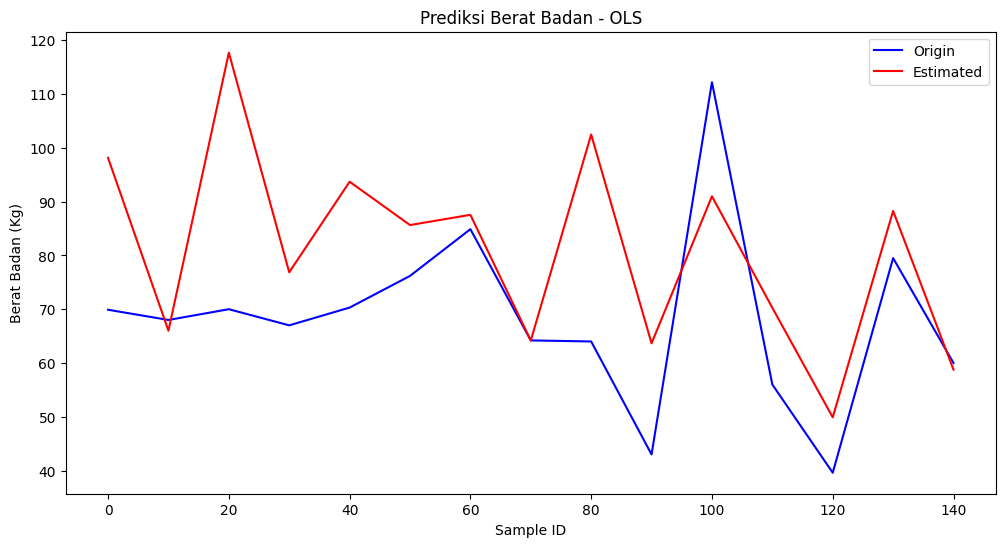

In [388]:
plt.figure(figsize=(12, 6))
# Mengambil data dari kolom pertama (index) di 'datasets' dan disimpan pada variabel x
x = datasets.iloc[::10, 0].values  # Ambil data setiap 10 baris
# Membuat plot garis untuk 'Berat Real' setiap 10 baris data, berlabel "Origin"
plt.plot(x, datasets["Berat Real"][::10], label="Origin", color="b")
# Membuat plot garis untuk 'Berat Prediksi' setiap 10 baris data, berlabel "Estimated"
plt.plot(x, datasets["Berat Prediksi"][::10], label="Estimated", color="r")
plt.legend()
# Menambahkan label pada sumbu x
plt.xlabel('Sample ID')
# Menambahkan label pada sumbu x
plt.ylabel('Berat Badan (Kg)')
# Memberikan judul untuk plot
plt.title('Prediksi Berat Badan - OLS')
# Menampilkan plot
plt.show()